# <center> *Music Recommendation  System*

### What is Recommendation system and how it is used for recommending the particular song to user

A recommender system, or a recommendation system is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.

Recommender systems are used in a variety of areas, with commonly recognised examples taking the form of playlist generators for video and music services, product recommenders for online stores, or content recommenders for social media platforms and open web content recommenders.
These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books, and search queries.

By using music recommender system, the music provider can predict and then offer the appropriate songs to their users based on the characteristics of the music that has been heard previously. 

Our research would like to develop a music recommender system that can give recommendations based on similarity of features on audio files.

#### Let us check the Information about the data

The Dataset that we are going to deal for this project is :
- kaggle_visible_evaluation_triplets - It contains User_Id of the listener,Song_Id of the song and frequency that is how many times the song has been played.

- Unique_tracks - It contains information about Track_id , Song_id, Artist_name and Release of the song.

#### Importing the necessary libraries for analysing the data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import random
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#### Reading the kaggle_triplets dataset 

In [60]:
song_df = pd.read_table('kaggle_visible_evaluation_triplets.txt',sep="\t",names=["user_id","song_id","Freq"])

#### Checking the head section of the dataset

In [61]:
song_df.head()

,user_id,song_id,Freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [62]:
### Checking the tail part of the data

song_df.tail()

,user_id,song_id,Freq
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2
1450932,5e650759ebf89012044c6d52121eeada8b0ec814,SOTCMDJ12A6D4F8528,3


#### Checking the information about the kaggle_triplets data

In [63]:
## Checking the for the columns in the dataset

song_df.columns
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1450933 non-null  object
 1   song_id  1450933 non-null  object
 2   Freq     1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


#### Reading the unique_tracks dataset to merge the two given datasets 

In [64]:
song_df2 = pd.read_table('unique_tracks.txt',sep='<SEP>',names=["Track_id","song_id","Artist_name","song_name"])

In [65]:
song_df2.head()

,Track_id,song_id,Artist_name,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [66]:
song_df2.tail()

,Track_id,song_id,Artist_name,song_name
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday
999999,TRYYYVU12903CD01E3,SOWXJXQ12AB0189F43,Texta,Fernweh feat. Sektion Kuchikäschtli


#### Drop the Track_id column as it is not much useful we know song or track have the similar features  so better drop those column

In [67]:
df2=song_df2.drop('Track_id',axis=1)

In [68]:
df2.head()

,song_id,Artist_name,song_name
0,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


#### Checking for the information about the data

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   Artist_name  1000000 non-null  object
 2   song_name    999985 non-null   object
dtypes: object(3)
memory usage: 22.9+ MB


#### Let us merge the two datasets together to perform some analysis on the given merged data

As we are merging the two datasets and we have a chance to encounter duplicates as we have same columns in two datasets called song_id so better drop those duplicates before merging the data

In [70]:
df = pd.merge(song_df,df2.drop_duplicates(['song_id']),on='song_id',how='left')

#### Checking the head of the dataset after merging 

In [71]:
df.head()

,user_id,song_id,Freq,Artist_name,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [72]:
## Checking the shape of the data,columns,info,and data types 
print("the shape of merged data is :",df.shape)
print("Checking for the column names:",df.columns)
print("Checking the length of the data :",len(df))
print("finding the Information about the data :",df.info())

the shape of merged data is : (1450933, 5)
Checking for the column names: Index(['user_id', 'song_id', 'Freq', 'Artist_name', 'song_name'], dtype='object')
Checking the length of the data : 1450933
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450933 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450933 non-null  object
 1   song_id      1450933 non-null  object
 2   Freq         1450933 non-null  int64 
 3   Artist_name  1450933 non-null  object
 4   song_name    1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB
finding the Information about the data : None


#### Let us check wheather our dataset is clean or not to proceed for Analysis part

In [73]:
## Checking for the null values

df.isnull().sum()

user_id        0
song_id        0
Freq           0
Artist_name    0
song_name      1
dtype: int64

In [74]:
df['song_name'].isnull().sum()

1

In [75]:
df=df.dropna().reset_index()

In [76]:
df.isnull().sum()

index          0
user_id        0
song_id        0
Freq           0
Artist_name    0
song_name      0
dtype: int64

In [77]:
# creating new feature combining title and artist name

# df['song'] = df['song_name']+' - '+df['Artist_name']

In [78]:
df.head()

,index,user_id,song_id,Freq,Artist_name,song_name
0,0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


#### Applying basic statistics to know about our data indepth

In [79]:
df.describe()

,index,Freq
count,1.450932e+06,1.450932e+06
mean,7.254664e+05,3.187151e+00
std,4.188483e+05,7.051666e+00
min,0.000000e+00,1.000000e+00
25%,3.627338e+05,1.000000e+00
50%,7.254665e+05,1.000000e+00
75%,1.088199e+06,3.000000e+00
max,1.450932e+06,9.230000e+02


In [80]:
df.describe(include = 'object')

,user_id,song_id,Artist_name,song_name
count,1450932,1450932,1450932,1450932
unique,110000,163205,28360,137622
top,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOFRQTD12A81C233C0,Coldplay,Sehr kosmisch
freq,53,5043,12279,5043


#### Checking for the skewness and kurtosis that is present within the data

In [81]:
print("Skewness Present in the data is almost : ",df.skew())
print("Kurtosis Present in the data is almost : ",df.kurt())

Skewness Present in the data is almost :  index    -0.000001
Freq     17.243840
dtype: float64
Kurtosis Present in the data is almost :  index     -1.199999
Freq     785.298304
dtype: float64


#### Checking for the unique values of each columns in the dataset

In [82]:
print("Number of Unique User id: {} \nNumber of Unique Song id: {} \nNumber of Unique Freq: {} \nNumber of Unique Artist names: {} \nNumber of Unique Song names: {} ".format(df["user_id"].nunique(),df["song_id"].nunique(),df["Freq"].nunique(),df["Artist_name"].nunique(),df["song_name"].nunique()),sep="\n")

Number of Unique User id: 110000 
Number of Unique Song id: 163205 
Number of Unique Freq: 299 
Number of Unique Artist names: 28360 
Number of Unique Song names: 137622 


### Performing the some data preprocessing and EDA  to find the insights in the data 

In [83]:
### Checking the value_counts for the User_id column 

df['user_id'].value_counts()

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    52
                                            ..
0818903f259c72534e01c37911432a22392bb419     5
d6e56e1514fda1abe7b9729a12c1f6180ae1ee7f     5
230e320c2e679ea5fbbfed7ae4dad7ad9e1f4f21     5
a1c14d5d7395a6bbb49d080f45b44c5e5cc28a8e     5
1a6f41f40adc550d5c6acefb7172c42e804126b4     5
Name: user_id, Length: 110000, dtype: int64

In [84]:
### Checking the number of unique songs that the user listened

print(len(pd.unique(df['user_id'])))

110000


These value counts show the number of unique songs that the user listened to. We have 110,000 users. Let us see how many among these have listened to more than 10 songs

#### Checking the number of users who listened more then 10 unique songs

In [85]:
v = df['user_id'].value_counts()
count = 0
for i in v:
    if i == 9:
        print(count)
        break
    count = count + 1

61841


Hence, we can see that around 62,000 users have listened to 10 or more unique songs.

### Checking for the  Song ID count

We intend to find number of times a song was played. For this, we need to take the frequency column under consideration as well. One way of doing this is by using the Song_ID as a key in dictionary and add the frequency of each of the occurences of that song.

In [86]:
df.shape

(1450932, 6)

In [87]:
artist_song_count = {}
songs = {}
for i in range(1450932):
    if df['song_id'][i] in songs:
        songs[df['song_id'][i]] = songs[df['song_id'][i]] + df['Freq'][i]
    else:
        songs[df['song_id'][i]] = df['Freq'][i]
        if df['Artist_name'][i] in artist_song_count:
            artist_song_count[df['Artist_name'][i]] = artist_song_count[df['Artist_name'][i]] + 1
        else:
            artist_song_count[df['Artist_name'][i]] = 1

We have song play count stored in a dictionary called songs. A song's playcount can be found out by accessing the dictionary with song id as the key

In [88]:
### Importing the operator library

import operator

In [89]:
### Creating a songs_sorted variable

songs_sorted = dict(sorted(songs.items(), key=operator.itemgetter(1),reverse=True))

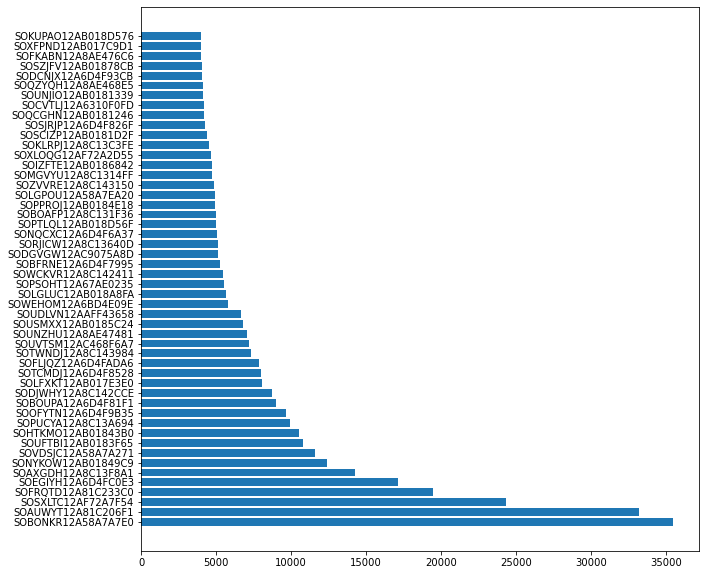

In [90]:
D = {}
for i in range(50):
    D[list(songs_sorted.keys())[i]]= list(songs_sorted.values())[i]
plt.figure(figsize=(10,10))
plt.barh(*zip(*D.items()))
plt.show()

Since the number of songs are very high, we did a countplot of the top 50 songs by playcount. From the countplot, we can observe that just 10 songs have a playcount of above 10,000. The remaining 40 songs have close playcounts between 5000 and 10,000. We can do a similar analysis for the next 50 songs.

#### Since the SongIDs are a bit difficult to read, lets replot with song name:  and Artist name on the y-axis

In [91]:
song_artist = {}
for i in range(1450932):
    if df['song_name'][i] + ':' + df['Artist_name'][i] in song_artist:
        song_artist[df['song_name'][i] + ':' + df['Artist_name'][i]] = song_artist[df['song_name'][i] + ':' + df['Artist_name'][i]] + df['Freq'][i]
    else:
        song_artist[df['song_name'][i] + ':' + df['Artist_name'][i]] = df['Freq'][i]

In [92]:
### Sorting the songs according to the artist names

s_art_sorted = dict(sorted(song_artist.items(), key=operator.itemgetter(1),reverse=True))

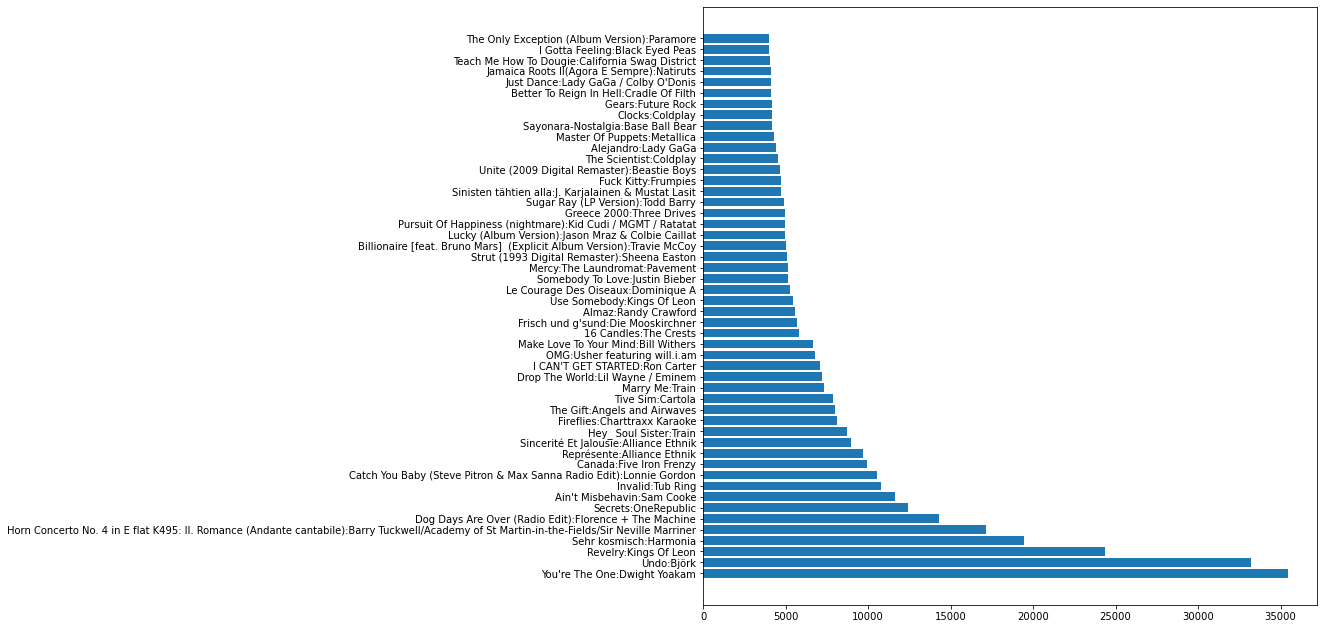

In [93]:
D1 = {}
for i in range(50):
    D1[list(s_art_sorted.keys())[i]]= list(s_art_sorted.values())[i]
plt.figure(figsize=(11,11))
plt.barh(*zip(*D1.items()))
plt.show()

When we plot the bargraph by considering the columns like song_name and the artist_name we can see that the "You're The One:Dwight Yoakam" and "Undo:Bjork" has  got the most listened count compare to other artist songs since we can say that those songs has been liked many users based on there listened count  

#### Let us check the  Artist_name based on there song value counts

In [94]:
## Checking the value count of artists

df['Artist_name'].value_counts()

Coldplay                                       12279
Kings Of Leon                                   8514
Florence + The Machine                          8213
Justin Bieber                                   7669
Jack Johnson                                    6784
                                               ...  
Glenn Tipton                                       1
Thomas Di Leva                                     1
Sidney Polak feat. EastWestRockers                 1
Norma Winstone_ Glauco Venier_ Klaus Gesing        1
Lee Coombs                                         1
Name: Artist_name, Length: 28360, dtype: int64

This data for number of songs by an artist is misguiding as songs are repeated.To find out the number of songs each artist releases, we access the dictionary 'songs' which has all the unique songs and find the artist name corresponding to that song and store this in a new dictionary. The dictionary artist_song_count does just that.

In [95]:
artist_song_count_sorted = dict(sorted(artist_song_count.items(), key=operator.itemgetter(1),reverse=True))

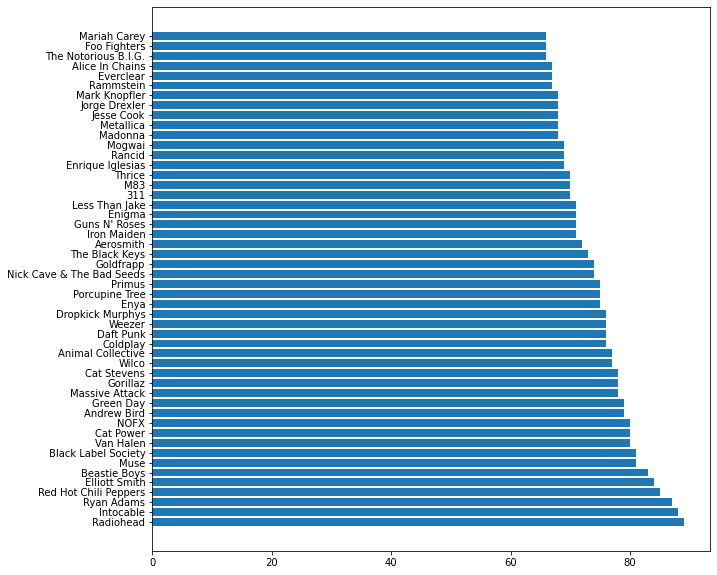

In [96]:
D2 = {}
for i in range(50):
    D2[list(artist_song_count_sorted.keys())[i]]= list(artist_song_count_sorted.values())[i]
plt.figure(figsize=(10,10))
plt.barh(*zip(*D2.items()))
plt.show()

The bar plot above shows the top 50 users with highest song counts. Almost 45 of these artists have more than 70 songs

#### Checking the Artist_name based on their songs listened count

In [97]:
(df.groupby(by=["Artist_name"]).sum()).sort_values(by = 'Freq', ascending = False)

,index,Freq
Artist_name,,
Kings Of Leon,6080546825,35857
Dwight Yoakam,3051126379,35688
Björk,3722575301,35210
Coldplay,8781618883,32135
Florence + The Machine,5989627100,28224
...,...,...
Mau - Telepopmusik,844649,1
Simon Says Feat. Aisjah,324543,1
Cyndi Lauper with Jeff Beck,1284749,1


Comparing the raw value_counts of artist name earlier gave us a wrong picture as that approach did not take the frequency of the song into consideration. After we correct that, we get **Kings of Leon** as the artist with most play counts followed by **Dwight Yoakam, Bjork** and **Coldplay**

In [98]:
### Checking the top 20 songs of different artist_names based on listen count

DF = (df.groupby(by=["Artist_name"]).sum()).sort_values(by = 'Freq', ascending = False)[:20]
DF.head(20)

,index,Freq
Artist_name,,
Kings Of Leon,6080546825,35857
Dwight Yoakam,3051126379,35688
Björk,3722575301,35210
Coldplay,8781618883,32135
Florence + The Machine,5989627100,28224
Justin Bieber,5481781317,26133
Alliance Ethnik,2898490819,21603
Train,4714475281,21356
OneRepublic,4316851496,20802


We can clearly see that Artists named **Kings of leon**,**Dwight Yoakam**,**Björk**,**Coldplay** has the most listened count to there songs 

In [99]:
song_artist_df = pd.DataFrame.from_dict(song_artist, orient='index',columns=['Song_count'])
song_artist_df.head()

,Song_count
You're The One:Dwight Yoakam,35432
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile):Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner,17115
Tive Sim:Cartola,7895
Catch You Baby (Steve Pitron & Max Sanna Radio Edit):Lonnie Gordon,10515
El Cuatrero:Miguel Calo,732


### Checking the distribution plot based on songs_count

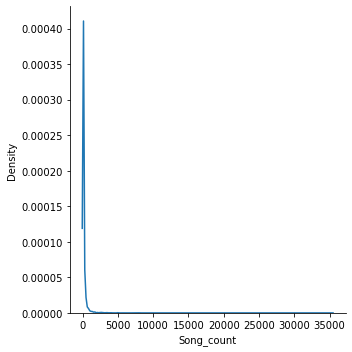

In [100]:
sns.displot(song_artist_df['Song_count'], kind = 'kde')
plt.show()

These distribution plot shows that very few songs have high playcounts

### Analysing the songs of Top Artists

#### 1. King of leon

In [101]:
df_kol = df.loc[df['Artist_name'] == 'Kings Of Leon']
df_kol.head()

,index,user_id,song_id,Freq,Artist_name,song_name
109,109,fdf6afb5daefb42774617cf223475c6013969724,SOPWKOX12A8C139D43,1,Kings Of Leon,Genius
135,135,18ce1da0e1017e31baaa5f80afa64ee3c7fab379,SOSXLTC12AF72A7F54,9,Kings Of Leon,Revelry
184,184,eda9bc7bcd72d18b9cf964990eb13a5b1789e78f,SOWCKVR12A8C142411,1,Kings Of Leon,Use Somebody
329,329,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOSXLTC12AF72A7F54,2,Kings Of Leon,Revelry
370,370,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOWCKVR12A8C142411,1,Kings Of Leon,Use Somebody


In [102]:
### Checking the shape of df_kol dataframe
df_kol.shape

(8514, 6)

In [103]:
df_kol = df_kol.reset_index()

In [104]:
df_kol.head()

,level_0,index,user_id,song_id,Freq,Artist_name,song_name
0,109,109,fdf6afb5daefb42774617cf223475c6013969724,SOPWKOX12A8C139D43,1,Kings Of Leon,Genius
1,135,135,18ce1da0e1017e31baaa5f80afa64ee3c7fab379,SOSXLTC12AF72A7F54,9,Kings Of Leon,Revelry
2,184,184,eda9bc7bcd72d18b9cf964990eb13a5b1789e78f,SOWCKVR12A8C142411,1,Kings Of Leon,Use Somebody
3,329,329,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOSXLTC12AF72A7F54,2,Kings Of Leon,Revelry
4,370,370,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOWCKVR12A8C142411,1,Kings Of Leon,Use Somebody


In [105]:
kol_songs = {}
for i in range(8514):
    if df_kol['song_name'][i] in kol_songs:
        kol_songs[df_kol['song_name'][i]] = kol_songs[df_kol['song_name'][i]] + df_kol['Freq'][i]
    else:
        kol_songs[df_kol['song_name'][i]] = df_kol['Freq'][i]

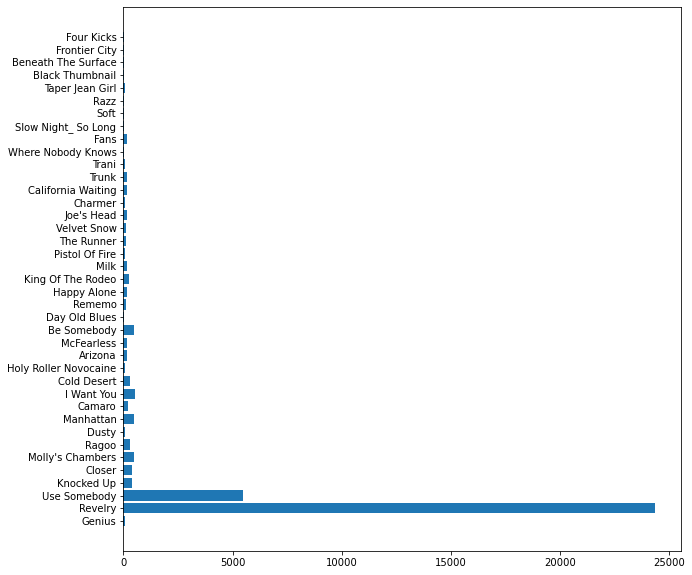

In [106]:
plt.figure(figsize=(10,10))
plt.barh(*zip(*kol_songs.items()))
plt.show()

We look on the bar plot the songs like **Revelry and Use Somebody** heavily contributed to King of Leon's high playcount

### 2. Dwight Yoakam

In [107]:
df_dy = df.loc[df['Artist_name'] == 'Dwight Yoakam']

In [108]:
df_dy.shape

(4246, 6)

In [109]:
df_dy.columns

Index(['index', 'user_id', 'song_id', 'Freq', 'Artist_name', 'song_name'], dtype='object')

In [110]:
df_dy = df_dy.reset_index()

In [111]:
songs_dy = {}
for i in range(4246):
    if df_dy['song_name'][i] in songs_dy:
        songs_dy[df_dy.loc[i,'song_name']] = songs_dy[df_dy.loc[i,'song_name']] + df_dy.loc[i,'Freq']
    else:
        songs_dy[df_dy.loc[i,'song_name']] = df_dy.loc[i,'Freq']

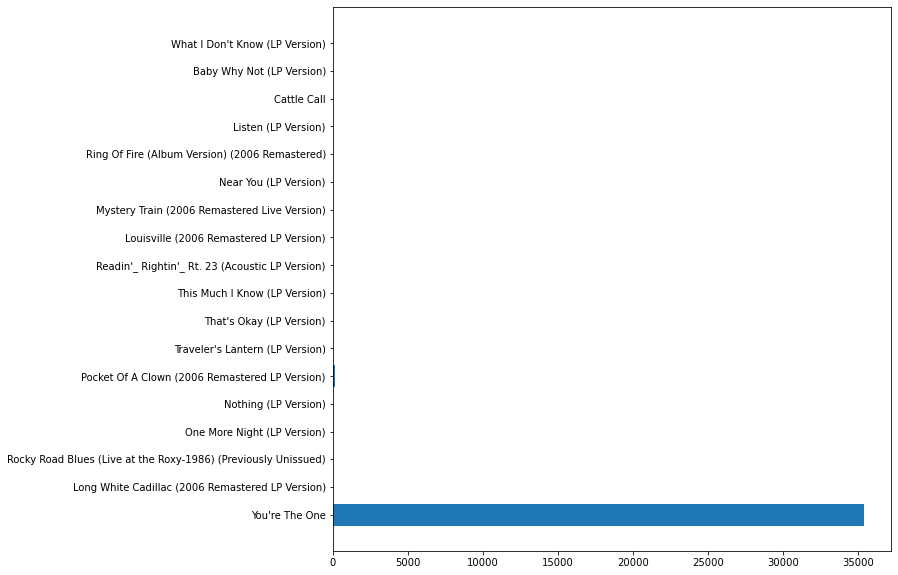

In [112]:
plt.figure(figsize=(10,10))
plt.barh(*zip(*songs_dy.items()))
plt.show()

We can boldly conclude that the song **'You're The One'** contributes to Dwight Yoakams high song playcount on its own

### 3. Coldplay

In [113]:
df_cp = df.loc[df['Artist_name'] == 'Coldplay']

In [114]:
df_cp.shape

(12279, 6)

In [115]:
df_cp = df_cp.reset_index()

In [116]:
songs_cp = {}
for i in range(12279):
    if df_cp['song_name'][i] in songs_cp:
        songs_cp[df_cp.loc[i,'song_name']] = songs_cp[df_cp.loc[i,'song_name']] + df_cp.loc[i,'Freq']
    else:
        songs_cp[df_cp.loc[i,'song_name']] = df_cp.loc[i,'Freq']

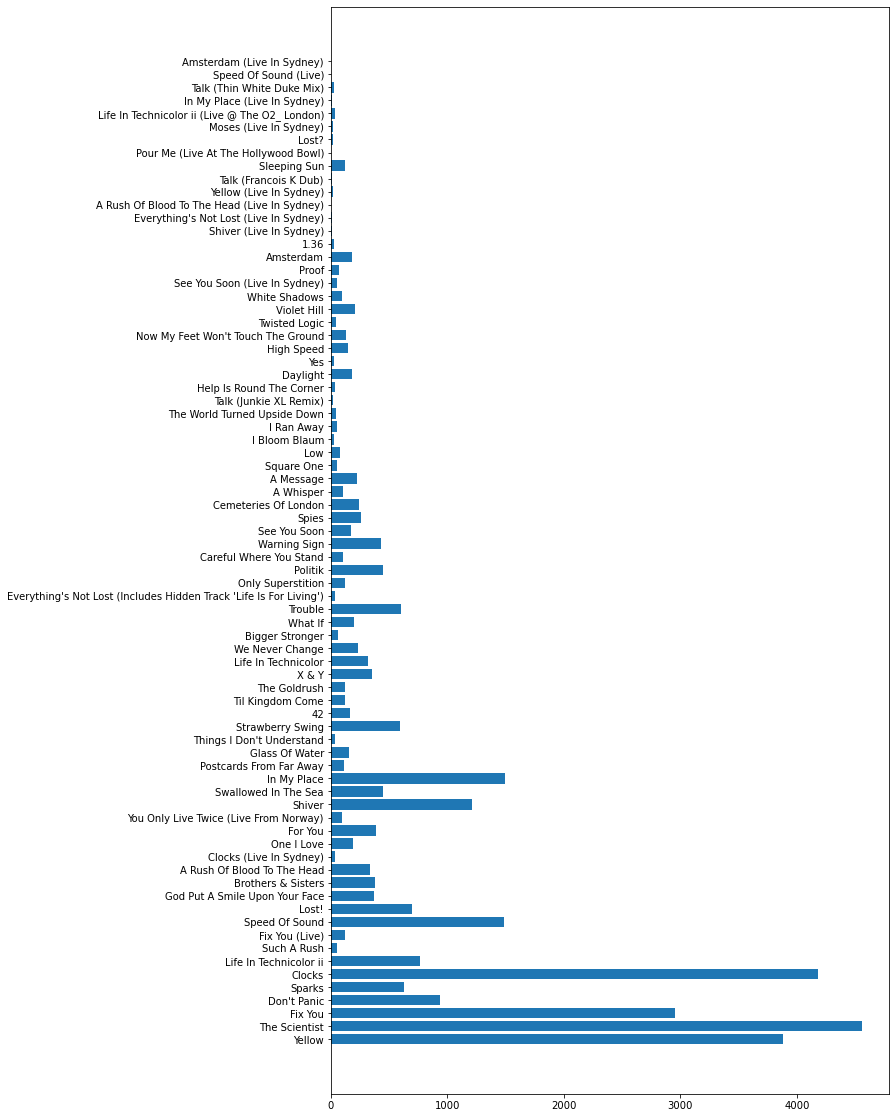

In [117]:
plt.figure(figsize=(10,20))
plt.barh(*zip(*songs_cp.items()))
plt.show()

Coldplay has a number of songs contributing to their high song playcount. Major contributors are the songs **The Scientist,Clocks,Yellow** and **Fix you**. The songs **In my place,Shiver** and **Speed of sound** also contibute significantly.

Until now we have did some **Exploratory data analysis** across different columns in dataset with respect to song_id,artist_name etc Now let us take our Original data and do the further prediction in building the recommendation systems

In [118]:
df = pd.merge(song_df,df2.drop_duplicates(['song_id']),on='song_id',how='left')

In [119]:
df.head()

,user_id,song_id,Freq,Artist_name,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [120]:
### Creating a song column which combine both song_name and Artist_name

df['song'] = df['song_name']+' - '+df['Artist_name']

In [121]:
df.head()

,user_id,song_id,Freq,Artist_name,song_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Tive Sim - Cartola
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


In [122]:
df=df.dropna().reset_index()

In [123]:
df.head()

,index,user_id,song_id,Freq,Artist_name,song_name,song
0,0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Tive Sim - Cartola
3,3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


In [124]:
df.shape

(1450932, 7)

Upto now we have understood the **data and done some exploratory data analysis** let us built some popular **recomendation models to predict the Songs to New and Existing users**

#### Predicting the Recommendation model by using Popularity based Filtering

In [126]:
### Top 10 popular songs. We recommend these to a new user

for i in list(D1.keys())[:10]:
    print(i)

You're The One:Dwight Yoakam
Undo:Björk
Revelry:Kings Of Leon
Sehr kosmisch:Harmonia
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile):Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Dog Days Are Over (Radio Edit):Florence + The Machine
Secrets:OneRepublic
Ain't Misbehavin:Sam Cooke
Invalid:Tub Ring
Catch You Baby (Steve Pitron & Max Sanna Radio Edit):Lonnie Gordon


Till now we have the songs sorted by popularity. Now, we recommend these songs in a batch of 10 songs to the user. We only recommend songs which the user did not previously listen to.

In [127]:
### Creating a User dictionary

users = {}
for i in range(1450932):
    if df['user_id'][i] in users:
        if df['song_id'][i] not in users[df['user_id'][i]]:
            users[df['user_id'][i]].append(df['song_id'][i])
    else:
        users[df['user_id'][i]] = []
        (users[df['user_id'][i]]).append(df['song_id'][i])

In [135]:
popular_songs = list(s_art_sorted.keys())[:65]

In [136]:
popular_songs_ids = list(songs_sorted.keys())[:65]

In [137]:
# Recommend a song to a user

def recommend(User):
    k = 0
    recommended_songs = []
    while k < 10:
        if popular_songs_ids[k] not in users[User]:
            k = k + 1
            recommended_songs.append(popular_songs[k])
    return recommended_songs

In [138]:
# This is most generally used to recommend for a new user

print(list(songs_sorted.values())[:10])

[35432, 33179, 24359, 19454, 17115, 14279, 12392, 11610, 10794, 10515]


In [139]:
#For an existing user

result = recommend(df['user_id'][6])
for i in result:
    print(i)

Undo:Björk
Revelry:Kings Of Leon
Sehr kosmisch:Harmonia
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile):Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Dog Days Are Over (Radio Edit):Florence + The Machine
Secrets:OneRepublic
Ain't Misbehavin:Sam Cooke
Invalid:Tub Ring
Catch You Baby (Steve Pitron & Max Sanna Radio Edit):Lonnie Gordon
Canada:Five Iron Frenzy


In [140]:
# creating new feature combining title and artist name

df['song'] = df['song_name']+' - '+df['Artist_name']

In [141]:
# taking top 50k samples for predicting the quick results

df = df.head(50000)

#### Predicting the Recommendation model using Item based  Collaborative filtering

In [142]:
import recommender as recommender

ir = recommender.item_similarity_recommender_py()
ir.create(df, 'user_id', 'song')

In [143]:
user_items = ir.get_user_items(df['user_id'][5])

In [144]:
# display user songs history

for user_item in user_items:
    print(user_item)

You're The One - Dwight Yoakam
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Tive Sim - Cartola
Catch You Baby (Steve Pitron & Max Sanna Radio Edit) - Lonnie Gordon
El Cuatrero - Miguel Calo
Unite (2009 Digital Remaster) - Beastie Boys


In [145]:
# give song recommendation for that user

ir.recommend(df['user_id'][5])

No. of unique songs for the user: 6
no. of unique songs in the training set: 25834
Non zero values in cooccurence_matrix :4732


,user_id,song,score,rank
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Undo - Björk,0.067280,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Revelry - Kings Of Leon,0.063660,2
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,La Magia De Tus Besos - Grupo Niche,0.055556,3
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Everybody's Fool - Evanescence,0.055556,4
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Histoire de geek - Smash hit combo,0.055556,5
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Cuenta Conmigo - Jerry Rivera,0.055556,6
6,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Heaven's Missing An Angel - 98º,0.055556,7
7,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,That's The Way Love Goes - David Frizzell,0.055556,8
8,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Rattlechaser - Xploding Plastix,0.055556,9
9,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Fly With Me - 98º,0.055556,10


In [146]:
# give related songs based on the artist names

ir.get_similar_items(['Représente - Alliance Ethnik', 'Secrets - OneRepublic'])

no. of unique songs in the training set: 25834
Non zero values in cooccurence_matrix :1822


,user_id,song,score,rank
0,,Dog Days Are Over (Radio Edit) - Florence + Th...,0.070349,1
1,,You're The One - Dwight Yoakam,0.066960,2
2,,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.063751,3
3,,Catch You Baby (Steve Pitron & Max Sanna Radio...,0.059145,4
4,,Revelry - Kings Of Leon,0.054947,5
5,,Undo - Björk,0.054057,6
6,,OMG - Usher featuring will.i.am,0.052382,7
7,,Billionaire [feat. Bruno Mars] (Explicit Albu...,0.052007,8
8,,Sehr kosmisch - Harmonia,0.051036,9
9,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.049951,10


#### Implementing the Collaborative filtering using the KNN algorithm method

In [149]:
### importing the necessary files for implementing the KNN algorithm

from scipy.sparse import csr_matrix
import knn_recommender as knn_recommender

#### Preparing the data for further prediction using KNN

In [150]:
### Let us check how many songs a user listen an average?

song_user = df.groupby('user_id')['song_id'].count()

In [151]:
### Checking an average a user listen to a song

print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 13.27668613913967 songs


In [152]:
### Checking the songs listen count of user with min and max of songs

print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 11.0 songs, with minimum 5 and maximum 48 songs


In [153]:
#Unique songs

unique_songs = df['song_id'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 25922 unique songs in the dataset


In [154]:
#Unique users

unique_users = df['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 3766 unique users in the dataset


In [155]:
# Get how many values should it be if all songs have been listen by all users

values_matrix = unique_users * unique_songs

In [156]:
# Substract the total values with the actural shape of the DataFrame songs

zero_values_matrix = values_matrix - df.shape[0]

In [157]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 97572252 values that are zero


In [158]:
# Get users which have listen to at least 16 songs

song_ten_id = song_user[song_user > 16].index.to_list()

In [159]:
# Filtered the dataset to keep only those users with more than 16 listened

df_song_id_more_ten = df[df['user_id'].isin(song_ten_id)].reset_index(drop=True)

We need now to work with a scipy-sparse matrix to avoid overflow and wasted memory. For that purpose, we'll use the csr_matrix function from scipy.sparse.

In [160]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='Freq').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [161]:
df_songs_features.head()

user_id,0011d5f4fb02ff276763d385c3f2ded2b00ad94a,003998bc33cddeba02428a43391c6716e523c8f7,00587ee69421cb6abc50898714c23583f1f4e230,006d3c79b9ed677280f8ddbc422d7b0fedd6d1fa,00803872fb1f0d39ecd256f4a247b7cbad24adbc,0093ea2ad5eebbfe7635a70909b7988d1b340a5a,0107197bd5e2521cfa1cfde3faf9a6b39e8ba9e3,016ec728b1aaa73da066447563527a938283689d,019609d3709369e5873379957dd2600f23ae6c06,02caaa0349f5d7aa54a6a262308a4ada43ad46d2,...,fe0eaa62792ed707620017a0fb97708e4b5b9b2e,fe689955bd257be982038af9c5311ea10b8425dc,fe72da2659f236126c9fb8eeccc6d8c48b9cedcf,fee9ab51f26ac7d3ae5f8b812ba8128385533963,ff022f15bf7cb8fb7e9d319cc03229b62a8c4a4a,ff14ed610f9ef040b7a7bf67e6646aee49672ca5,ff3af695709783f8242105de952741d55f3970df,ff96171f15f41e020b329af498d184c464f6cee7,ffca2f5069c381b20171dc14404b2e5e1141692b,ffe98099df91d5ff4a9ab02f58bb9dc87b278cb2
song_id,,,,,,,,,,,,,,,,,,,,,
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFYH12A8C13717A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAGYY12A6D4F705E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
df_unique_songs = df.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id','song_name']]

In [163]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].song_name))
}

#### Model and recommendations
So, we know that we want to use the model to predict songs. For that, we'll use the Recommender class wrote in the knn_recommender file.

In [164]:
from knn_recommender import Recommender
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [165]:
song = "Représente"

In [166]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)


Starting the recommendation process for Représente ...
... Done


In [167]:
print(f"The recommendations for {song} song are:")
new_recommendations

The recommendations for Représente song are:


['Bigger Boys and Stolen Sweethearts',
 'Only Superstition',
 'La Poupée',
 'Mundian To Back Me',
 'U Make Me Wanna',
 'Mony Mony',
 'Number One (Explicit Album Version) (Feat. Kanye West)',
 'Peace Sign / Index Down [feat. Busta Rhymes] (Explicit Album Version)',
 'Damien III',
 'The Gift']

#### Applying the content based filtering for recommending the songs 

#### importing necessary libraries for content based filtering

In [169]:
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Here we are using the TfidfVectorizer and cosine_similarity for extracting the keyword from our data 

In [170]:
df.head()

,index,user_id,song_id,Freq,Artist_name,song_name,song
0,0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Tive Sim - Cartola
3,3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


In [171]:
df.shape

(50000, 7)

In [172]:
df=df.drop('index',axis=1)

In [173]:
df.head()

,user_id,song_id,Freq,Artist_name,song_name,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Tive Sim - Cartola
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


####  Here we are considering the 5k songs to work the content based filtering smoothly And we are dropping the freq column has it is numerical and cant be used while extracting the keyword

In [174]:
df = df.sample(n=5000).drop('Freq',axis=1).reset_index(drop=True)

Here we use TF-IDF vectorizerthat calculates the TF-IDF score for each song, word-by-word.We can replace this with description of the song if available

In [175]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [176]:
lyrics_matrix = tfidf.fit_transform(df['song'])

We now need to calculate the similarity of one song to another. to calculate those we are going to use cosine similarity.

We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the lyrics_matrix as argument.

In [177]:
cosine_similarities = cosine_similarity(lyrics_matrix)

Once we get the similarities, we'll store in a dictionary the names of the 50 most similar songs for each song in our dataset.

In [178]:
similarities = {}

for i in range(len(cosine_similarities)):
    
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs.
    
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    
    similarities[df['song'].iloc[i]] = [(cosine_similarities[i][x], df['song'][x], df['Artist_name'][x]) for x in similar_indices][1:]

Now We can use that similarity scores to access the most similar items and give a recommendation.
For that, to do that task we'll define our Content based recommender class.

In [179]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [180]:
recommedations = ContentBasedRecommender(similarities)

In [181]:
recommendation = {
    "song": df['song'].iloc[10],
    "number_songs": 10 
}

In [182]:
recommedations.recommend(recommendation)

The 10 recommended songs for When I Come To You - Jonny Lang are:
Number 1:
Red Light - Jonny Lang by Jonny Lang with 0.674 similarity score
--------------------
Number 2:
My Love Remains - Jonny Lang by Jonny Lang with 0.659 similarity score
--------------------
Number 3:
Uncle Jonny - The Killers by The Killers with 0.361 similarity score
--------------------
Number 4:
Come As You Are - Nirvana by Nirvana with 0.305 similarity score
--------------------
Number 5:
Here I Come - Fergie by Fergie with 0.286 similarity score
--------------------
Number 6:
Auld Lang Syne (Album Version) - Relient K by Relient K with 0.28 similarity score
--------------------
Number 7:
I'd Come For You (Album Version) - Nickelback by Nickelback with 0.279 similarity score
--------------------
Number 8:
I'd Come For You (Album Version) - Nickelback by Nickelback with 0.279 similarity score
--------------------
Number 9:
Come With Me (Album Version) - DAY26 by DAY26 with 0.247 similarity score
--------------

### Hybrid Recommendation system

Hybrid recommendation system is the most used recommendation system approach used in music and movie recommendation projects, it combines the collaborative filtering, content-based filtering, and other approaches.

Hybrid approaches can be implemented in several ways: by making content-based and collaborative-based predictions separately and then combining them or by adding content-based capabilities to a collaborative-based approach (and vice versa), or by unifying the approaches into one model.

Hybrid methods can also be used to overcome some of the common problems in recommender systems such as cold start and the sparsity problem.  **NetFlix** is the good example which use the hybrid recommendation systems effectively 

**This model combines the recommendations generated from content-based, collaborative filtering and SVD model. The hybrid model overcomes the shortcomings of individual models and improves the diversity of the recommendations**

#### Importing the Necessary modules from the surprise library 

In [183]:
from surprise import SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import dump

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [185]:
reader = Reader()
data = Dataset.load_from_df(song_df[['user_id','song_id','Freq']],reader)

In [186]:
trainset, testset = train_test_split(data, test_size=0.25)

In [188]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

#### Matrix Factorization based on SVDpp approach

In [189]:
### Evaluating the SVD(Single Value Decomposition) model from surprise library

algo = SVD()

### Train the algorithm on trainset and predict the Frequency on testset
algo.fit(trainset)
predictions = algo.test(testset)

### Let us check the RMSE value of SVD 

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 7.1096
MAE:  4.0355


4.035535995751783

In [190]:
### Evaluating the Baselineonly model from surprise library  

algo = BaselineOnly()

### Train the algorithm on trainset and predict the Frequency on testset
algo.fit(trainset)
predictions = algo.test(testset)

### Let us check the RMSE value of Baselineonly

accuracy.rmse(predictions)
accuracy.mae(predictions)

Estimating biases using als...
RMSE: 6.6644
MAE:  2.5732


2.573236105769552

In [191]:
### Evaluating the SVDpp from surprise library
algo = SVDpp()

### Train the algorithm on trainset and predict the Frequency on testset
algo.fit(trainset)
predictions = algo.test(testset)

### Let us check the RMSE value of SVDpp model

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 7.1096
MAE:  4.0355


4.03551911522511

#### Collaborative filtering algorithm based on Non-negative Matrix Factorization.

In [192]:
### Checking the collaborative based on NMF 
algo = NMF()

# Train the algorithm on the trainset, and predict Frequency for the testset
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 6.7670
MAE:  2.3266


2.3266039924660804

#### Comparing the all algorithms on RMSE and MAE and showing there results by plotting a graph

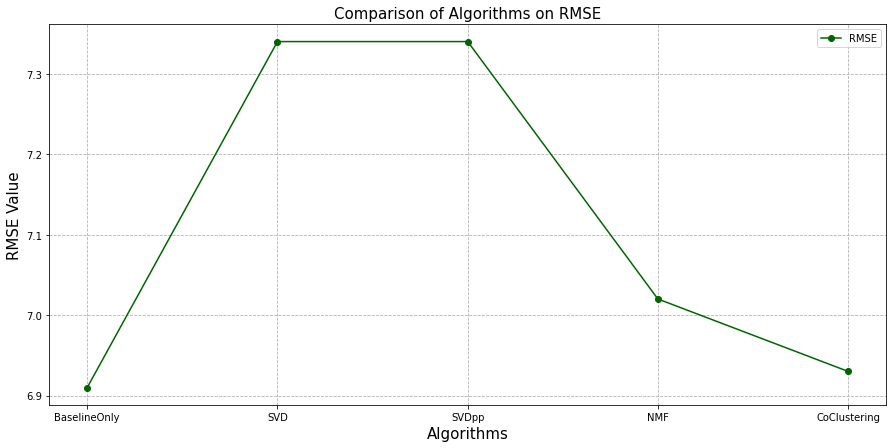

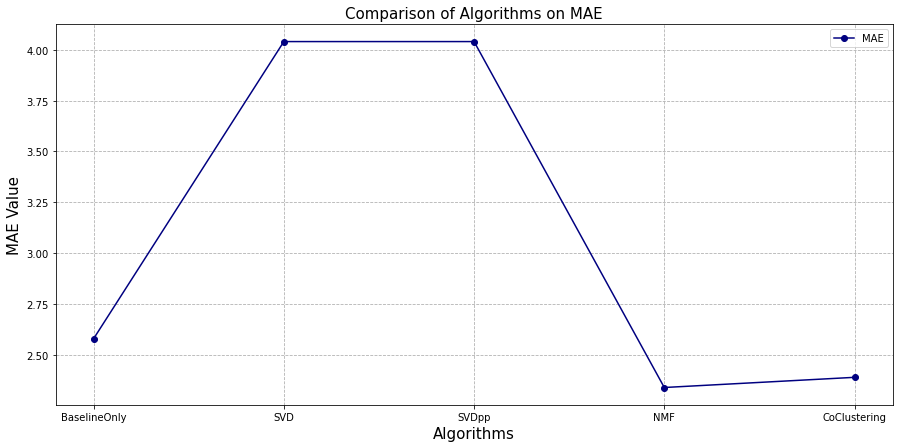

In [193]:
x_algo = ['BaselineOnly', 'SVD', 'SVDpp', 'NMF', 'CoClustering']


rmse = [6.91,7.34,7.34,7.02,6.93]
mae = [2.58,4.04,4.04,2.34,2.39]
fit_time = [4.586215, 55.877482,3256.132195,55.372593,19.347667]
test_time = [2.908219,2.632710,73.504739,2.918873,2.986175]

plt.figure(figsize=(15,7))

# plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.show()

# plt.subplot(1, 2, 2)
plt.figure(figsize=(15,7))
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

#### Comparision of algorithms by on RMSE and MAE and by fit_time and train_time

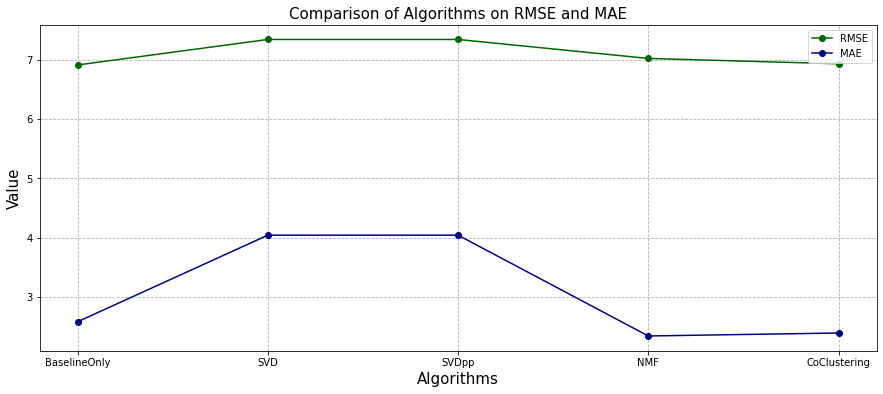

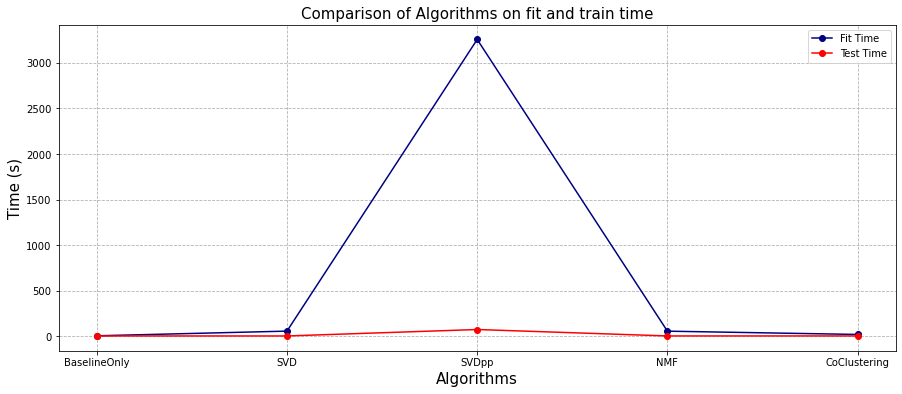

In [194]:
x_algo = ['BaselineOnly','SVD', 'SVDpp', 'NMF','CoClustering']

rmse = [6.91,7.34,7.34,7.02,6.93]
mae = [2.58,4.04,4.04,2.34,2.39 ]
fit_time = [4.586215,55.877482,3256.132195,55.372593,19.347667]   
test_time = [2.908219,2.632710,73.504739,2.918873,2.986175]

plt.figure(figsize=(15,6))
plt.title('Comparison of Algorithms on RMSE and MAE', loc='center', fontsize=15)
plt.plot(x_algo, rmse, label='RMSE', color='darkgreen', marker='o')
plt.plot(x_algo, mae, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.show()

plt.figure(figsize=(15,6))
plt.title('Comparison of Algorithms on fit and train time', loc='center', fontsize=15)
plt.plot(x_algo, fit_time, label='Fit Time', color='navy', marker='o')
plt.plot(x_algo, test_time, label='Test Time', color='red', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Time (s)', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.show()